In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg

In [2]:
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [ ]:
#Loading the dataset

In [4]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [6]:
#pixel represenation of a number present in X_train[0]
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
#So it was the pixel reprsentaion of 5
print(y_train[0])

5


In [8]:
#Getting the shape of image
X_train.shape
#we have 28*28 image where we have 60000 images in t=our training set

(60000, 28, 28)

In [9]:
len(X_train[0][0])

28

In [10]:
len(X_train[0])

28

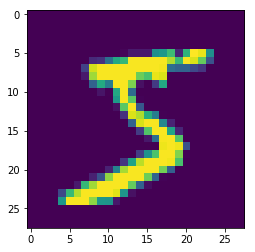

In [12]:
plt.imshow(X_train[0])

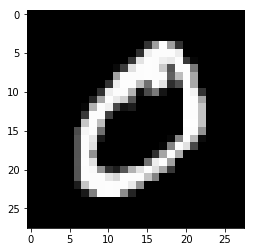

In [15]:
plt.imshow(X_train[1],cmap='gist_gray')

In [17]:
y_train[1]

0

In [ ]:
#Using Deep Learning CNN to process  our data

In [18]:
import keras

Using TensorFlow backend.


In [19]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
#reshaping them into 4d tensors so they can be processed using keras

In [20]:
X_train.shape

(60000, 28, 28, 1)

In [21]:
X_test.shape

(10000, 28, 28, 1)

In [22]:
from keras.layers import Conv2D,Dropout
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense


In [23]:
model=Sequential()

In [24]:
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,kernel_size=(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=10,activation='softmax'))


In [25]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [33]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test=to_categorical(y_test
                     )


In [34]:
y_train.shape

(60000, 10)

In [36]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [35]:
model.fit(X_train,y_train)

Epoch 1/1
60000/60000 [==============================] - 59s 980us/step - loss: 0.2384 - accuracy: 0.9460


In [31]:
# i have got approx 95% accuracy in only one epoch

In [37]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 2s 241us/step


[0.07486364210156025, 0.9771000146865845]

In [ ]:
#testing

In [38]:
#prediction
pred=model.predict_proba(X_test[1].reshape(1,28,28,1))
pred

array([[3.56198940e-03, 4.76898313e-05, 9.96352077e-01, 8.31962499e-09,
        2.36275464e-05, 2.50811265e-08, 1.35012715e-05, 2.09538142e-09,
        1.01699300e-06, 7.71856676e-11]], dtype=float32)

In [ ]:
num_class=model.predict_classes(X_test[1].reshape(1,28,28,1))


In [41]:
print(num_class)

[2]


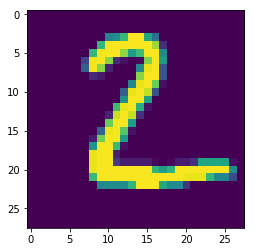

In [42]:
plt.imshow(X_test[1].reshape(28,28))

In [43]:
pred1=model.predict_classes(X_test[1009].reshape(1,28,28,1))

In [44]:
pred1

array([0])

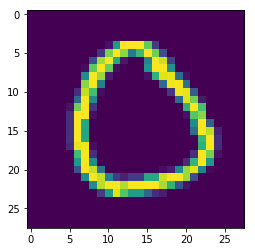

In [46]:
plt.imshow(X_test[1009].reshape(28,28))

In [47]:
#hence we can see that we have coorectly predicted our output